### **Análise de Sentimentos em texto com pysentimiento/bertweet-pt-sentiment**

In [1]:
#!pip install pysentimiento
#!pip install transformers

In [1]:
import pandas as pd
from pysentimiento import create_analyzer

/home/akira/.pyenv/versions/3.10.6/envs/voice_to_action/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
analyzer = create_analyzer(task="sentiment", lang="pt")

a = analyzer.predict("isto é bonito")
a.output
a.probas['POS']
# returns AnalyzerOutput(output=POS, probas={POS: 0.998, NEG: 0.002, NEU: 0.000})

0.9856607913970947

### **Função para análise com modelo acima e análise do dataframe com as transcrições**

In [3]:
df = pd.read_csv('raw_data/dataset_transcrito_validado.csv', sep=';')
df.head(5)

,Unnamed: 0,path,sentence,count_caracteres,texto_transcrito_modelo,WER,CER,dataset_normalizado,transcricao_normalizada,WER_normalizado,CER_normalizado
0,0,common_voice_pt_37591374.mp3,"actínio, tório, protactínio, urânio, netúnio, ...",134,actine otorio protactínio urânio Netuno ameríc...,1.000000,0.462687,"actinio, torio, protactinio, uranio, netunio, ...",actine otorio protactinio uranio Netuno americ...,1.000000,0.447761
1,1,common_voice_pt_37526011.mp3,"disfunção sexual, erétil, ejaculação precoce, ...",115,disfunção sexual erétil ejaculação precoce vag...,0.583333,0.060870,"disfuncao sexual, eretil, ejaculacao precoce, ...",disfuncao sexual eretil ejaculacao precoce vag...,0.583333,0.060870
2,2,common_voice_pt_37274519.mp3,"eletroafinidade, eletronegatividade, eletropos...",121,eletroafinidade eletronegatividade eletroposit...,1.222222,0.099174,"eletroafinidade, eletronegatividade, eletropos...",eletroafinidade eletronegatividade eletroposit...,1.222222,0.099174
3,3,common_voice_pt_32308715.mp3,Cipó,4,Cipó,0.000000,0.000000,Cipo,Cipo,0.000000,0.000000
4,4,common_voice_pt_32341511.mp3,Iepê,4,Iepê,0.000000,0.000000,Iepe,Iepe,0.000000,0.000000


In [4]:
# Deve retornar um output assim (output=POS, probas={POS: 0.998, NEG: 0.002, NEU: 0.000})

def analise_sentimento_texto(df):
    lista_analise = []

    for texto_transcrito_modelo in df:
        analisador = create_analyzer(task="sentiment", lang="pt")
        analisado = analisador.predict(texto_transcrito_modelo)
        lista_analise.append({'texto_transcrito_modelo':texto_transcrito_modelo,
                            'Qual sentimento?': analisado.output,
                            'prob_sentimento_positivo': analisado.probas['POS'],
                            'prob_sentimento_neutro': analisado.probas['NEU'],
                            'prob_sentimento_negativo': analisado.probas['NEG']
                            })
    return pd.DataFrame(lista_analise)

In [5]:
df_sentimento = analise_sentimento_texto(df['texto_transcrito_modelo'])
df_sentimento.head(5)

,texto_transcrito_modelo,Qual sentimento?,prob_sentimento_positivo,prob_sentimento_neutro,prob_sentimento_negativo
0,actine otorio protactínio urânio Netuno ameríc...,NEU,0.039091,0.949051,0.011857
1,disfunção sexual erétil ejaculação precoce vag...,NEG,0.016407,0.302794,0.680799
2,eletroafinidade eletronegatividade eletroposit...,NEU,0.088898,0.901622,0.009479
3,Cipó,NEU,0.028392,0.951698,0.019910
4,Iepê,NEU,0.104295,0.871371,0.024335


### **Análise dos áudios do drive da Ana**

/tmp/ipykernel_2014/975782715.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('raw_data/validated.tsv', sep='\t')


A taxa de erros de caracteres média antes da normalização foi de 12.57%


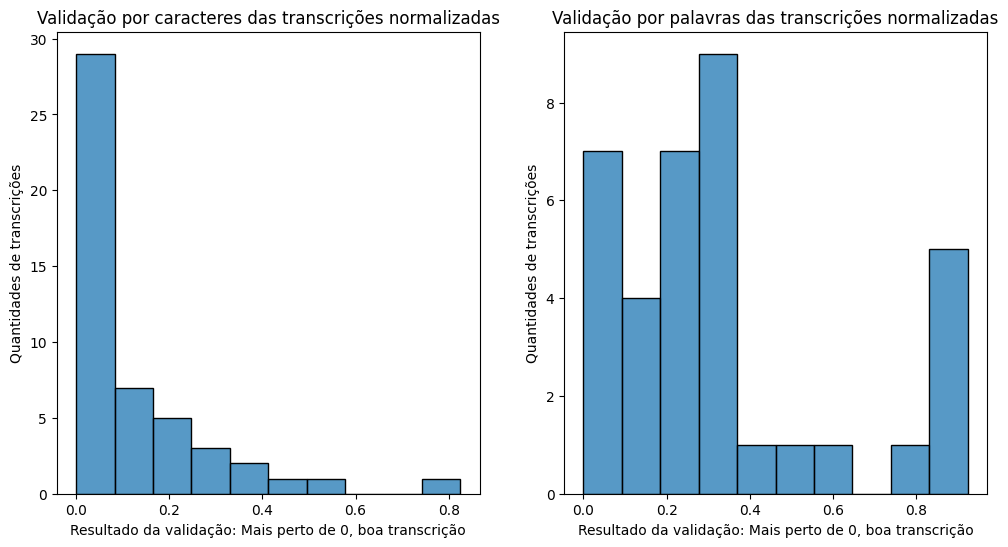

In [7]:
%run '/home/akira/code/acbarrosramos/voice_to_action/dataset_transcricao_01.ipynb'

#### **Áudios positivos**

In [8]:
#Análise dos áudios positivos
pasta_positiva = "/home/akira/code/acbarrosramos/voice_to_action/cv-corpus-17.0-2024-03-15-pt/cv-corpus-17.0-2024-03-15/pt/positive_audio/positive/"
df_ana_positivo = transcrever_arquivos_na_pasta(pasta_positiva)
df_ana_positivo

,path,texto_transcrito_modelo
0,bfammn17_segment107_non-neutral-female.wav,vou chegar até lá no alto
1,bpubcv03_segment194_non-neutral-female.wav,Não foi possível entender o áudio
2,bpubcv09_segment395_non-neutral-female.wav,Não foi possível entender o áudio
3,bpubdl09_segment147_non-neutral-male.wav,eu te agradeço
4,bfamdl05_segment396_non-neutral-male.wav,voltou no no no no no no que você já viu
...,...,...
112,bfamdl03_segment115_non-neutral-female.wav,eu concordei nós conversamos tanto sobre isso
113,bfamdl09_segment521_non-neutral-male.wav,Não foi possível entender o áudio
114,bfammn22_segment161_non-neutral-female.wav,enquanto eu não falo do carrinho ele não ele n...
115,bpubmn01_segment81_non-neutral-female.wav,como eu já tinha dito né anteriormente a maior...


In [9]:
df_positivo = analise_sentimento_texto(df_ana_positivo['texto_transcrito_modelo'])
df_positivo

In [ ]:
df_ana_positivo.merge(df_positivo, how='inner')

,path,texto_transcrito_modelo,Qual sentimento?,prob_sentimento_positivo,prob_sentimento_neutro,prob_sentimento_negativo
0,bfammn17_segment107_non-neutral-female.wav,vou chegar até lá no alto,NEU,0.064990,0.927480,0.007530
1,bpubcv03_segment194_non-neutral-female.wav,Não foi possível entender o áudio,NEG,0.012676,0.293475,0.693849
2,bpubcv03_segment194_non-neutral-female.wav,Não foi possível entender o áudio,NEG,0.012676,0.293475,0.693849
3,bpubcv03_segment194_non-neutral-female.wav,Não foi possível entender o áudio,NEG,0.012676,0.293475,0.693849
4,bpubcv03_segment194_non-neutral-female.wav,Não foi possível entender o áudio,NEG,0.012676,0.293475,0.693849
...,...,...,...,...,...,...
2004,bfamdl09_segment521_non-neutral-male.wav,Não foi possível entender o áudio,NEG,0.012676,0.293475,0.693849
2005,bfamdl09_segment521_non-neutral-male.wav,Não foi possível entender o áudio,NEG,0.012676,0.293475,0.693849
2006,bfammn22_segment161_non-neutral-female.wav,enquanto eu não falo do carrinho ele não ele n...,NEU,0.044881,0.553164,0.401955
2007,bpubmn01_segment81_non-neutral-female.wav,como eu já tinha dito né anteriormente a maior...,NEU,0.011472,0.917082,0.071446


#### **Áudios negativos**

In [ ]:
#Análise dos áudios negativos
pasta_negativa = "/home/akira/code/acbarrosramos/voice_to_action/cv-corpus-17.0-2024-03-15-pt/cv-corpus-17.0-2024-03-15/pt/negative_audio/negative/"
df_ana_negativo = transcrever_arquivos_na_pasta(pasta_negativa)
df_ana_negativo

,path,texto_transcrito_modelo
0,tristeza_2_5.mp3,lá ela é advogada também e eu tô 9 meses longe...
1,monologo_briga_casal_male_3.mp3,Você tá de brincadeira com a minha cara né Voc...
2,funilaria_part13_3.mp3,que você vai devolver para ele sem problemas a...
3,part_5.mp3,contenha-se Doutor por conta da dos lados e pe...
4,casosdefamilia_2.mp3,Galinha Pintadinha
...,...,...
94,casosdefamilia_8.mp3,Ok Google alguém obrigou a viagem você vai ouv...
95,traicao_1.mp3,você tá vendo esse vídeo aqui não tá lembrando...
96,monologo_briga_casal_6.mp3,eu não vou morrer se você disser que não quer ...
97,part_4.mp3,Doutora promoção de Justiça não continência a ...


In [ ]:
df_negativo = analise_sentimento_texto(df_ana_negativo['texto_transcrito_modelo'])
df_negativo

,texto_transcrito_modelo,Qual sentimento?,prob_sentimento_positivo,prob_sentimento_neutro,prob_sentimento_negativo
0,lá ela é advogada também e eu tô 9 meses longe...,NEG,0.099562,0.413102,0.487337
1,Você tá de brincadeira com a minha cara né Voc...,NEG,0.009519,0.007400,0.983081
2,que você vai devolver para ele sem problemas a...,NEU,0.091286,0.802921,0.105793
3,contenha-se Doutor por conta da dos lados e pe...,NEU,0.162112,0.490766,0.347122
4,Galinha Pintadinha,NEU,0.289512,0.681678,0.028809
...,...,...,...,...,...
94,Ok Google alguém obrigou a viagem você vai ouv...,NEG,0.027816,0.157694,0.814490
95,você tá vendo esse vídeo aqui não tá lembrando...,NEU,0.092910,0.804743,0.102347
96,eu não vou morrer se você disser que não quer ...,NEU,0.149099,0.552592,0.298310
97,Doutora promoção de Justiça não continência a ...,NEG,0.010009,0.019929,0.970062


#### **Áudios neutros**

In [ ]:
#Análise dos áudios neutros
pasta_neutra = "/home/akira/code/acbarrosramos/voice_to_action/cv-corpus-17.0-2024-03-15-pt/cv-corpus-17.0-2024-03-15/pt/neutral_audio/neutral/"
df_ana_neutro = transcrever_arquivos_na_pasta(pasta_neutra)
df_ana_neutro

,path,texto_transcrito_modelo
0,bfamcv17_segment170_neutral.wav,aí foi lá para casa e correram os dois vai par...
1,bpubmn14_segment83_neutral.wav,depois dos outros dois saírem e eu continuei
2,bfamdl09_segment513_neutral.wav,ou talvez tenha sido a única vez que isso tenh...
3,bpubdl01_segment233_neutral.wav,ontem eu passeei com ela dois dias seguido hoj...
4,bfamcv18_segment176_neutral.wav,segunda-feira que o Carlos não
...,...,...
121,bfamcv15_segment204_neutral.wav,sangue negativo é ruim você sabia
122,bfamcv02_segment291_neutral.wav,Não foi possível entender o áudio
123,bfamcv05_segment200_neutral.wav,você quer que vai fazer de cabeça ou quer que ...
124,bfamdl09_segment429_neutral.wav,efeito é uma importância também


In [ ]:
df_neutro = analise_sentimento_texto(df_ana_neutro['texto_transcrito_modelo'])
df_neutro

,texto_transcrito_modelo,Qual sentimento?,prob_sentimento_positivo,prob_sentimento_neutro,prob_sentimento_negativo
0,aí foi lá para casa e correram os dois vai par...,NEG,0.024768,0.112699,0.862534
1,depois dos outros dois saírem e eu continuei,NEU,0.035918,0.690208,0.273874
2,ou talvez tenha sido a única vez que isso tenh...,NEU,0.010834,0.954440,0.034725
3,ontem eu passeei com ela dois dias seguido hoj...,NEU,0.039679,0.767215,0.193106
4,segunda-feira que o Carlos não,NEG,0.040446,0.152982,0.806572
...,...,...,...,...,...
121,sangue negativo é ruim você sabia,NEG,0.011566,0.329848,0.658586
122,Não foi possível entender o áudio,NEG,0.012676,0.293475,0.693849
123,você quer que vai fazer de cabeça ou quer que ...,NEU,0.012360,0.895118,0.092523
124,efeito é uma importância também,NEU,0.255921,0.731821,0.012258
